In [1]:
from pprint import pprint
import numpy as np
from pkg.Layers import Activation, Dense
from pkg.loss import mse, mse_prime
from tqdm import tqdm
import matplotlib.pyplot as plt

def tanh_prime(x):
    return 1 - np.tanh(x)**2


class Tanh(Activation):
    def __init__(self):
        super().__init__(np.tanh, tanh_prime)

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
X = X.reshape((4, 2, 1))
Y_true = np.array([0, 1, 1, 0])
Y_true = Y_true.reshape((4, 1, 1))

network = [
    Dense(X.shape[1], 3),
    Tanh(),
    Dense(3, 1),
    Tanh(),
]

100%|██████████| 10000/10000 [00:03<00:00, 3002.13it/s]


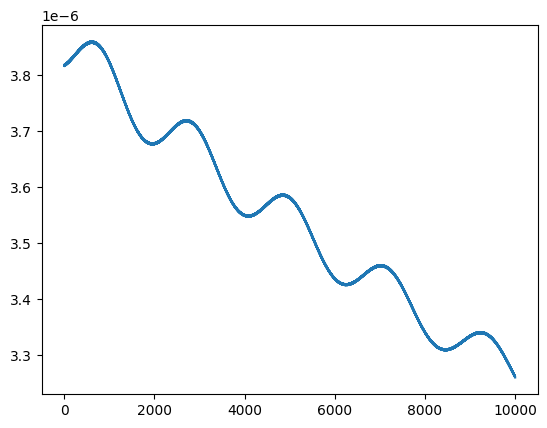

In [17]:
#
epochs = 10000
learning_rate = 0.1
LOSS = []
#
for epoch in tqdm(range(epochs)):
    E = 0
    # forward pass ->
    for x, y in zip(X, Y_true):
        Y_pred = x
        for layer in network:
            Y_pred = layer.forward(Y_pred)

        E += mse(Y_pred, y)
    # backward pass <-
        output_gradient = mse_prime(Y_pred, y)
        for i in range(len(network)-1, -1, -1):
            layer = network[i]
            output_gradient = layer.backward(output_gradient, learning_rate)
    E /= X.shape[0]
    LOSS.append(E)
    #print(f"Error = {E}")

plt.plot(LOSS)
plt.show()
